In [1]:
%matplotlib inline

from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
from WeinerGenerator import getWeiner
from scipy.stats import norm
import math
from tqdm.notebook import trange, tqdm

def plotWeinerSteps(steps, tend, maxsteps):
    ts, ws, dws, dt = getWeiner(steps, tend)

    #fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    plt.plot(ts, ws, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps))
    #fig2.scatter(ts, dws)

def plotRealizationDistribution(steps, realizations):
    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization = realization)
        fig1.plot(ts, ws)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)
    fig2.plot(x, y)

    return x,y

def getRealizationDistribution(steps, realizations):
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization = realization)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)

    return x,y

  0%|          | 0/1000 [00:00<?, ?it/s]

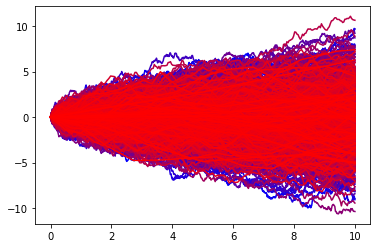

In [2]:
maxsteps = 1000
for steps in tqdm(range(maxsteps)):
   plotWeinerSteps(maxsteps-steps, 10, maxsteps)

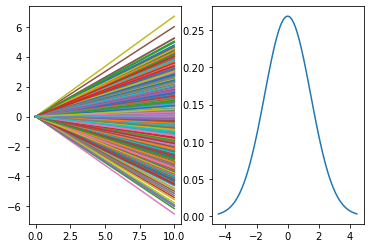

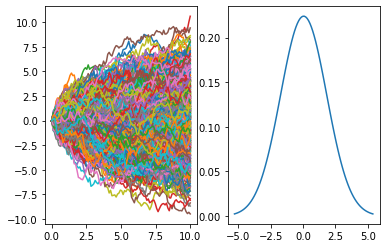

In [3]:
x1,y1 = plotRealizationDistribution(2, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

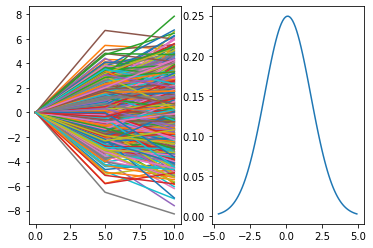

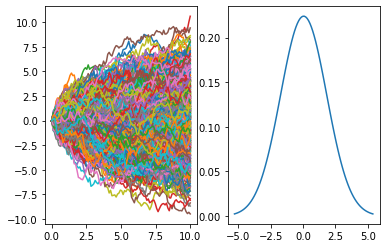

In [4]:
x1,y1 = plotRealizationDistribution(3, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

  0%|          | 0/48 [00:00<?, ?it/s]

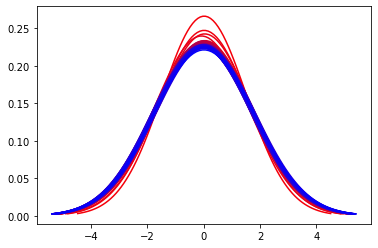

In [6]:
maxsteps = 50

fig3 = plt.figure()

for steps in tqdm(np.arange(2,maxsteps)):
    x,y = getRealizationDistribution(steps, 5000)
    plt.plot(x, y, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps), label = steps)